In [ ]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import training dataset

df = pd.read_csv('/content/train.csv')
df.head(10)

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
0,295,94DKEP,2750102,1905204,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89
1,923,94FTOJ,703684,2707623,2041,12440,CANCELED,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163
2,3254,94CP5P,2292525,1428994,634,3173,COMPLETED,NaN,"7215059,1428994,",0,6.0,NaN,1,58
3,1096,94D4G1,7585415,6412601,1279,7961,CANCELED,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112
4,1817,94EC6Q,1049024,6812604,1085,4242,CANCELED,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72
5,1326,94FL1O,1049207,223878,908,5084,CANCELED,NaN,"4332526,1537829,4320058,4862584,4140470,680999...",0,NaN,1049207.0,1,103
6,2967,94BJQK,36184,0,2018,10793,CANCELED,NaN,NaN,0,NaN,NaN,1,183
7,4475,94EH33,453261,534880,1391,5653,COMPLETED,4.0,"5543578,534880,",0,50.0,NaN,1,115
8,3281,94D6TK,7018863,4154958,1031,4496,COMPLETED,NaN,"7756588,3986702,4154958,",0,7.0,NaN,1,74
9,4736,94EK0D,105805,7398319,1041,7015,COMPLETED,5.0,"7398319,",0,50.0,NaN,1,130


In [ ]:
df.shape

(3559, 14)

In [ ]:
df.columns

Index(['Unnamed: 0', 'hashed_id', 'rider_id', 'driver_id',
       'estimated_ride_duration', 'estimated_ride_distance', 'status',
       'rating', 'drivers_tried', 'review_requested', 'discount',
       'canceled_by', 'payment_type', 'estimated_fare'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559 entries, 0 to 3558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3559 non-null   int64  
 1   hashed_id                3559 non-null   object 
 2   rider_id                 3559 non-null   int64  
 3   driver_id                3559 non-null   int64  
 4   estimated_ride_duration  3559 non-null   int64  
 5   estimated_ride_distance  3559 non-null   int64  
 6   status                   3559 non-null   object 
 7   rating                   1095 non-null   float64
 8   drivers_tried            3386 non-null   object 
 9   review_requested         3559 non-null   int64  
 10  discount                 1690 non-null   float64
 11  canceled_by              1015 non-null   float64
 12  payment_type             3559 non-null   int64  
 13  estimated_fare           3559 non-null   int64  
dtypes: float64(3), int64(8),

In [ ]:
df.describe()

,Unnamed: 0,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,rating,review_requested,discount,canceled_by,payment_type,estimated_fare
count,3559.000000,3.559000e+03,3.559000e+03,3559.000000,3559.000000,1095.000000,3559.000000,1690.000000,1.015000e+03,3559.000000,3559.000000
mean,2560.197808,2.806252e+06,2.980735e+06,1251.835347,7504.365271,4.678539,0.005339,27.957988,2.979669e+06,1.015454,125.894352
std,1465.756383,2.671150e+06,2.706507e+06,478.069248,3910.272140,0.893223,0.072881,18.325845,2.689605e+06,0.123366,50.649609
min,0.000000,5.300000e+01,0.000000e+00,180.000000,0.000000,1.000000,0.000000,0.000000,5.300000e+01,1.000000,30.000000
25%,1277.500000,4.065085e+05,0.000000e+00,906.000000,4820.000000,5.000000,0.000000,12.000000,5.497005e+05,1.000000,90.000000
50%,2575.000000,1.849627e+06,2.642452e+06,1194.000000,6910.000000,5.000000,0.000000,20.000000,2.165753e+06,1.000000,120.000000
75%,3831.500000,5.059542e+06,5.413235e+06,1508.000000,9326.500000,5.000000,0.000000,50.000000,5.452958e+06,1.000000,154.000000
max,5084.000000,7.817100e+06,7.813169e+06,4166.000000,36815.000000,5.000000,1.000000,88.000000,7.816947e+06,2.000000,665.000000


In [ ]:
# sns.pairplot(df)

In [ ]:
# checking correlation between variables

df.corr()

,Unnamed: 0,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,rating,review_requested,discount,canceled_by,payment_type,estimated_fare
Unnamed: 0,1.000000,-0.045909,0.201193,0.129379,0.119131,0.003107,0.032341,0.068930,-0.011684,0.070724,0.099554
rider_id,-0.045909,1.000000,-0.005209,0.015939,0.021037,-0.072432,0.033313,-0.128663,0.901836,-0.061978,-0.019997
driver_id,0.201193,-0.005209,1.000000,-0.029801,-0.021581,-0.015469,0.043757,-0.006815,0.114537,0.070756,-0.097285
estimated_ride_duration,0.129379,0.015939,-0.029801,1.000000,0.952806,-0.023235,0.005656,0.151970,0.031309,-0.032157,0.884162
estimated_ride_distance,0.119131,0.021037,-0.021581,0.952806,1.000000,-0.032065,0.007039,0.147430,0.041079,-0.036573,0.915385
rating,0.003107,-0.072432,-0.015469,-0.023235,-0.032065,1.000000,-0.041400,0.063838,NaN,0.017858,-0.045468
review_requested,0.032341,0.033313,0.043757,0.005656,0.007039,-0.041400,1.000000,-0.073276,NaN,0.022081,-0.003502
discount,0.068930,-0.128663,-0.006815,0.151970,0.147430,0.063838,-0.073276,1.000000,NaN,0.037553,0.224593
canceled_by,-0.011684,0.901836,0.114537,0.031309,0.041079,NaN,NaN,NaN,1.000000,NaN,0.018992
payment_type,0.070724,-0.061978,0.070756,-0.032157,-0.036573,0.017858,0.022081,0.037553,NaN,1.000000,-0.033474


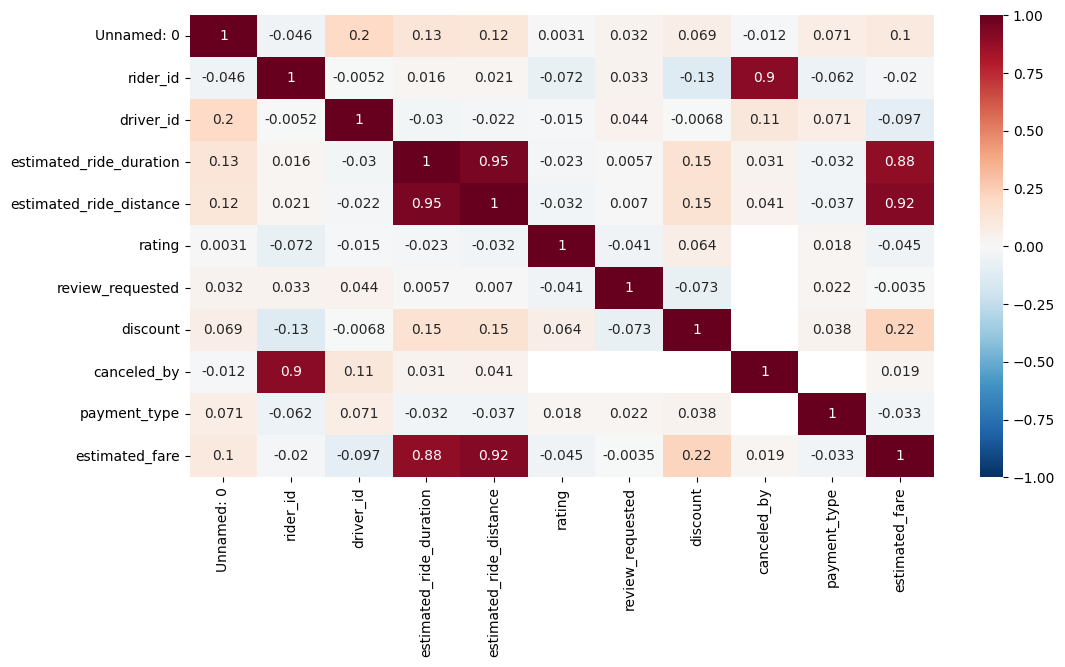

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

<Axes: xlabel='estimated_ride_duration', ylabel='Density'>

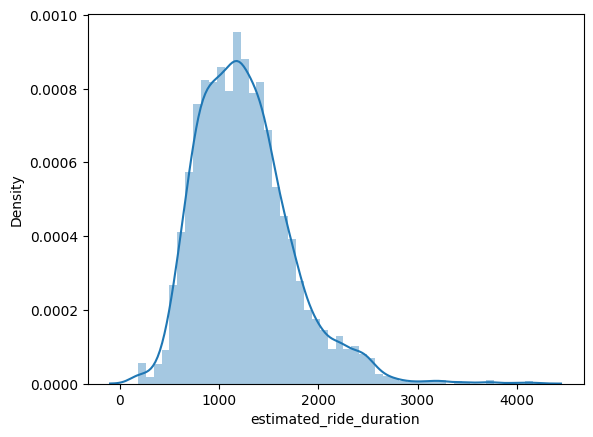

In [ ]:
# estimated_ride_duration = df['estimated_ride_duration']
sns.distplot(df['estimated_ride_duration'])

<Axes: xlabel='estimated_ride_distance', ylabel='Density'>

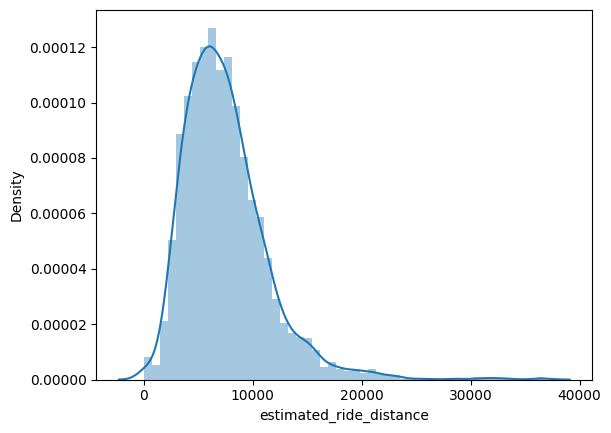

In [ ]:
sns.distplot(df['estimated_ride_distance'])

<Axes: xlabel='discount', ylabel='Density'>

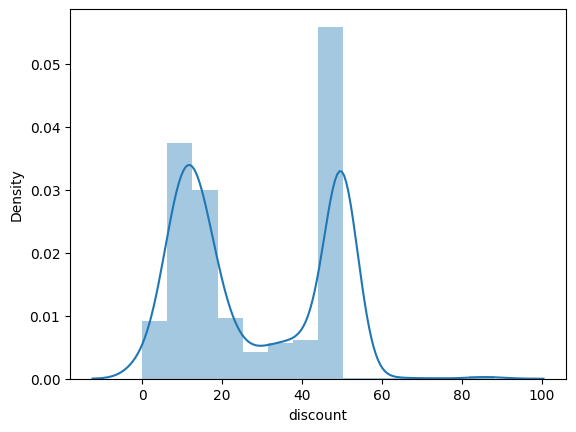

In [ ]:
sns.distplot(df['discount'])

<Axes: xlabel='rating', ylabel='Density'>

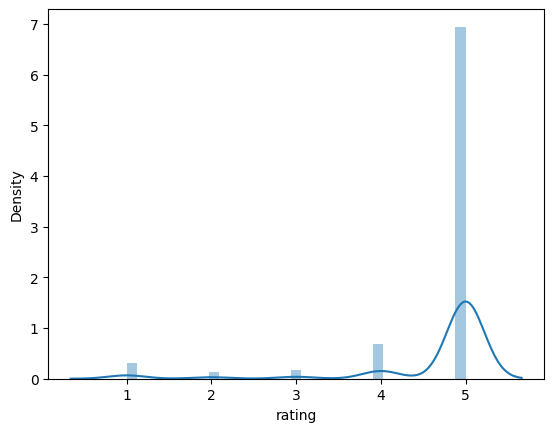

In [ ]:
sns.distplot(df['rating'])

<Axes: xlabel='canceled_by', ylabel='Density'>

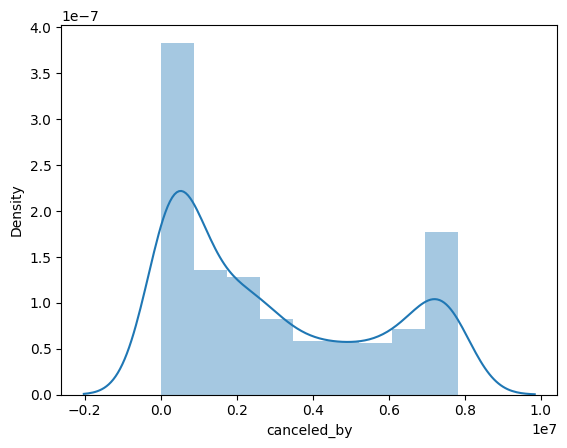

In [ ]:
sns.distplot(df['canceled_by'])


# Step 2: Data Preprocessing
- Checking missing values
- Handling mssing values
- Data Transformation
- Data Reduction

## Checking columns and finds some insights

In [ ]:
# checking is there any NaN value cantains in dataset

df.isna().values.any()

True

In [ ]:
# count of NaN values

df.isna().value_counts().sum()

3559

In [ ]:
# checking all the columns
df.isna().sum().sort_values(ascending=False)

canceled_by                2544
rating                     2464
discount                   1869
drivers_tried               173
Unnamed: 0                    0
hashed_id                     0
rider_id                      0
driver_id                     0
estimated_ride_duration       0
estimated_ride_distance       0
status                        0
review_requested              0
payment_type                  0
estimated_fare                0
dtype: int64

## Note: Here the column 'canceled_by' doesn't containtain any missing values. In that column, NaN mean `canceled by system` which defines `seccessfully completed ride`

<Axes: >

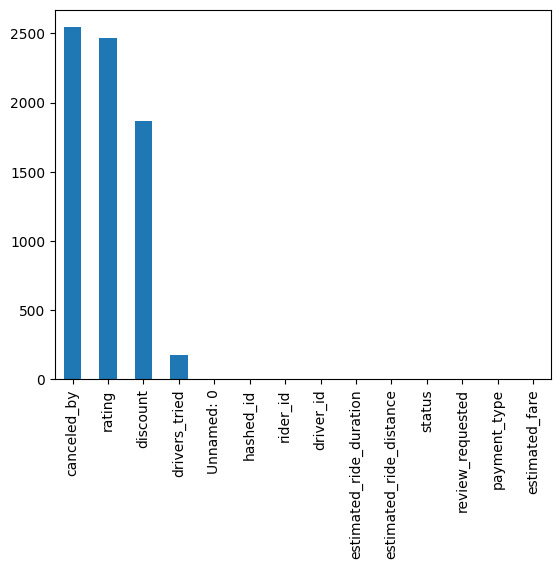

In [ ]:
df.isna().sum().sort_values(ascending=False).plot(kind='bar')

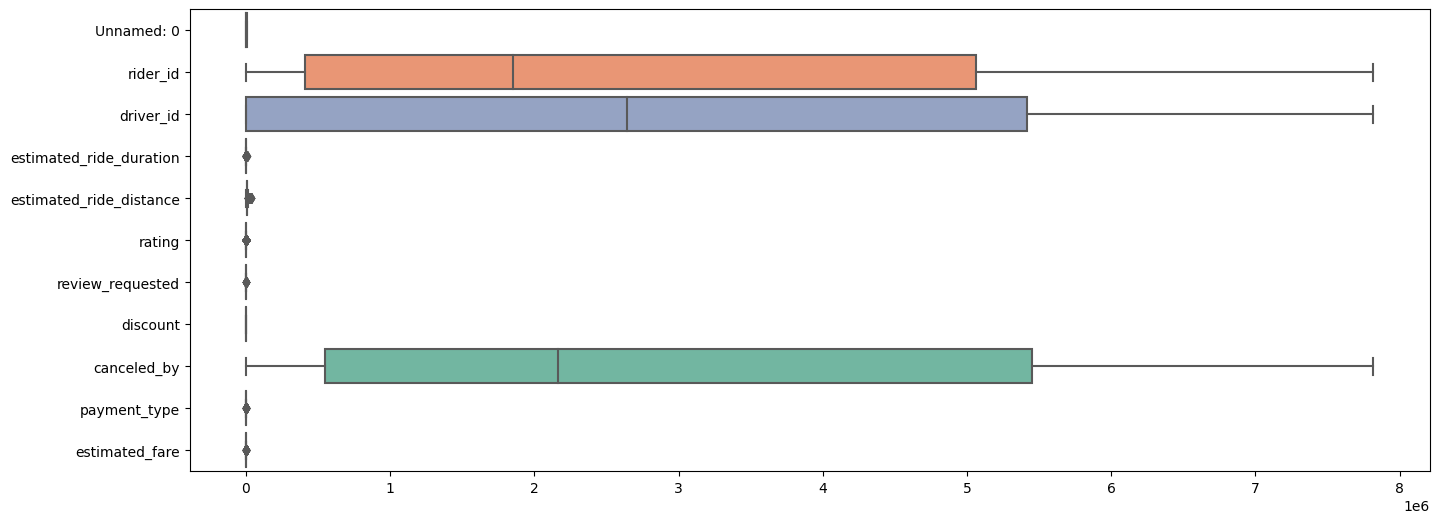

In [ ]:
# boxplot of the dataset
plt.figure(figsize=(16, 6))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

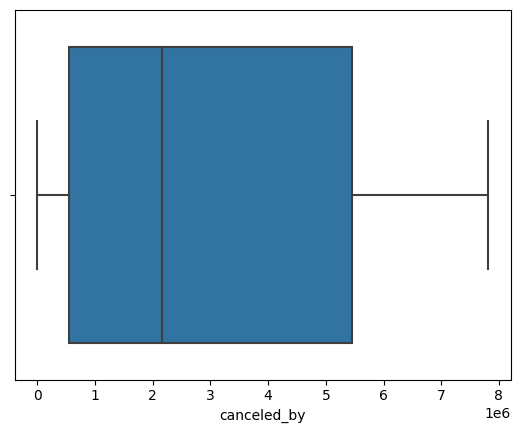

In [ ]:
# individual boxplots of canceled_by
ax = sns.boxplot(x=df["canceled_by"])

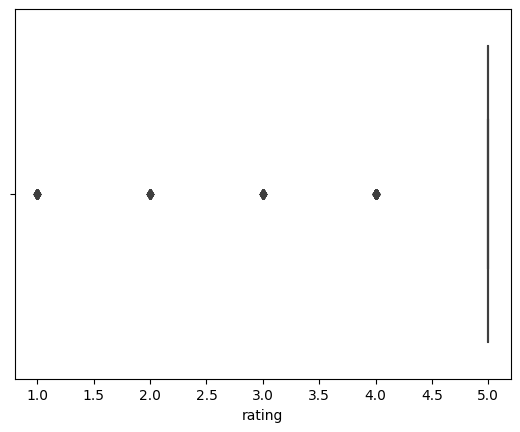

In [ ]:
# individual boxplots of rating
ax = sns.boxplot(x=df["rating"])

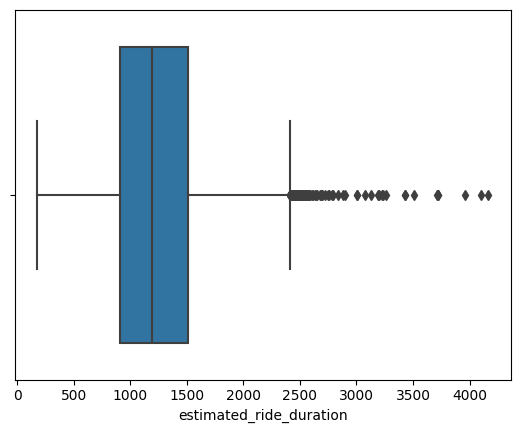

In [ ]:
# individual boxplots of estimated_ride_duration
ax = sns.boxplot(x=df["estimated_ride_duration"])

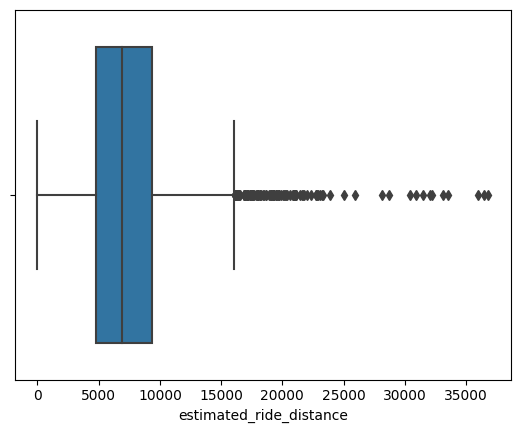

In [ ]:
# individual boxplots of estimated_ride_distance
ax = sns.boxplot(x=df["estimated_ride_distance"])

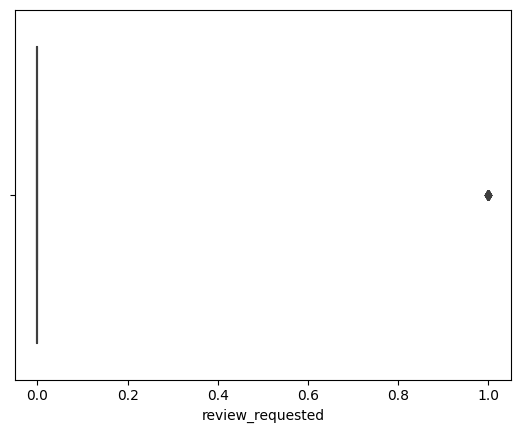

In [ ]:
# individual boxplots of review_requested
ax = sns.boxplot(x=df["review_requested"])

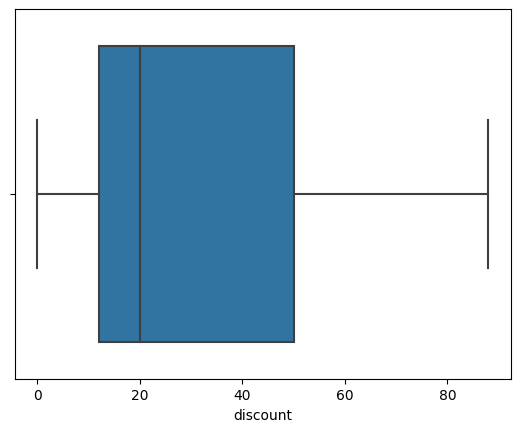

In [ ]:
# individual boxplots of discount
ax = sns.boxplot(x=df["discount"])

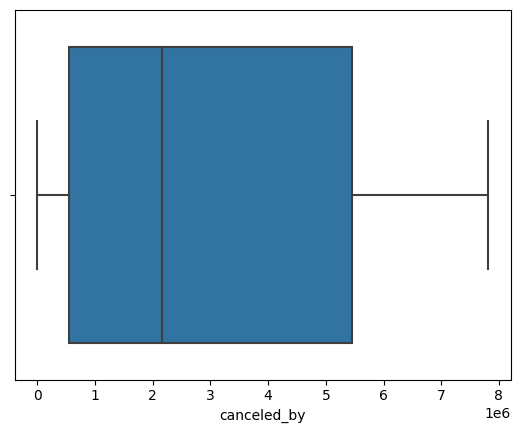

In [ ]:
# individual boxplots of canceled_by
ax = sns.boxplot(x=df["canceled_by"])

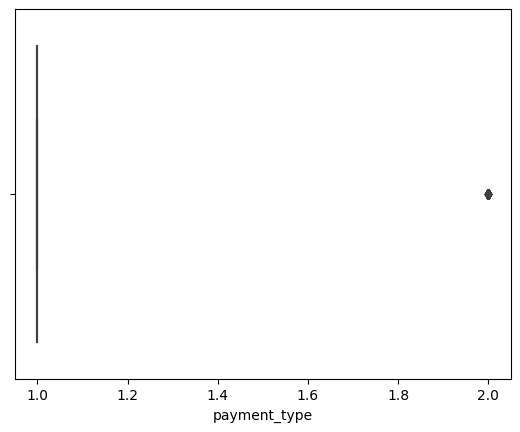

In [ ]:
# individual boxplots of payment_type
ax = sns.boxplot(x=df["payment_type"])

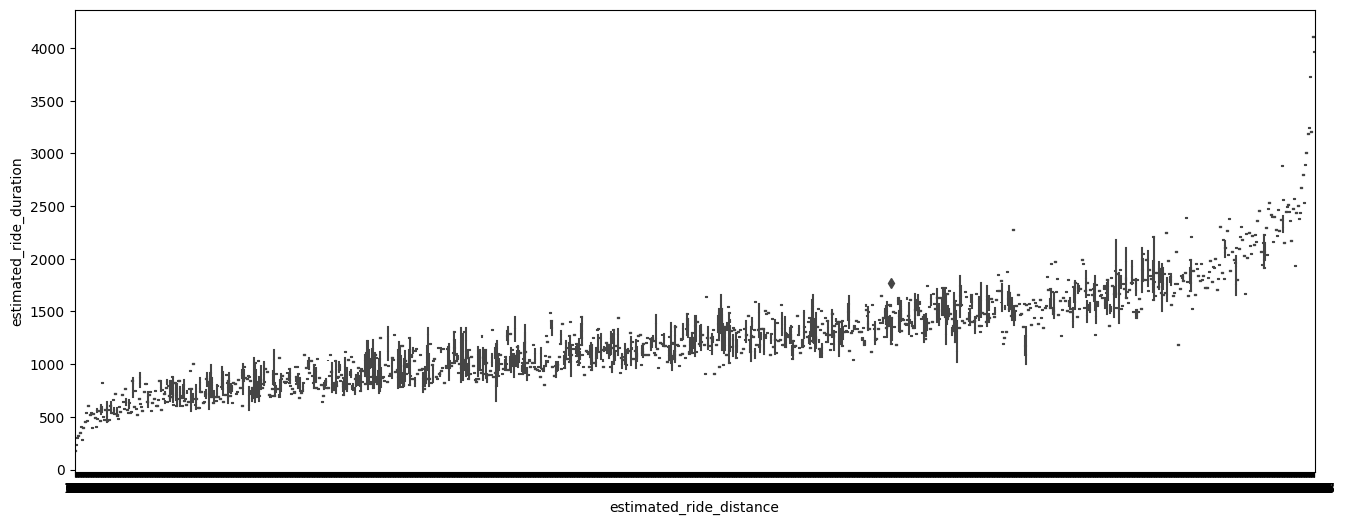

In [ ]:
# two variables boxplot. Although this figure can't help us finding any insights because of large dataset
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="estimated_ride_distance", y="estimated_ride_duration", data=df)

### Checking `canceled_by` column
NOTE: there is 2544 values are NaN.

In [ ]:
cancelBydriverAnddriver = df['canceled_by'].value_counts().sum()
cancelBydriverAnddriver

1015

In [ ]:
cancelBysystem = df['canceled_by'].isna().sum()
cancelBysystem

2544

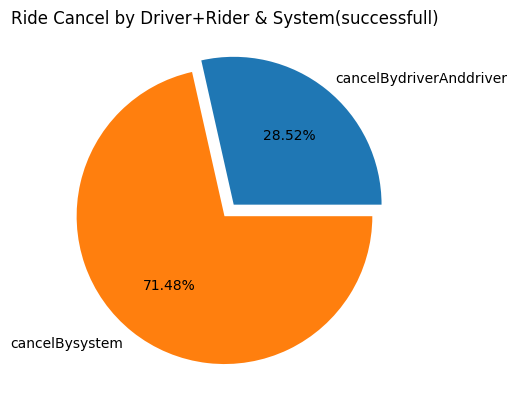

In [ ]:
labels = ['cancelBydriverAnddriver','cancelBysystem']
size = [1015, 2544]

plt.pie(size, labels=labels, autopct='%0.2f%%', explode=(0.1, 0))
plt.title('Ride Cancel by Driver+Rider & System(successfull)')
plt.show()

In [ ]:
# Separating canceled_by column into 3 sub-category

import pandas as pd

def separate_cancellation_reasons(df):
    cancelByRider = []
    cancelByDriver = []
    cancelBySystem = []

    for i, row in df.iterrows():
        canceled_by = row['canceled_by']
        rider_id = row['rider_id']
        driver_id = row['driver_id']

        if canceled_by == rider_id:
            cancelByRider.append(canceled_by)
        elif canceled_by == driver_id:
            cancelByDriver.append(canceled_by)
        else:
            cancelBySystem.append(canceled_by)

    return cancelByRider, cancelByDriver, cancelBySystem

cancelByRider, cancelByDriver, cancelBySystem = separate_cancellation_reasons(df)

print('Cancel by Rider: ', len(cancelByRider))
print('Cancel by Driver: ', len(cancelByDriver))
print('Cancel by System: ', len(cancelBySystem))

Cancel by Rider:  910
Cancel by Driver:  105
Cancel by System:  2544


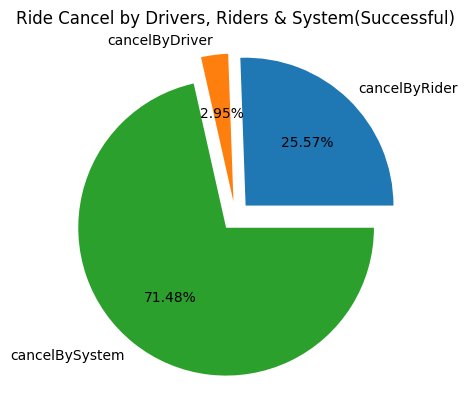

In [ ]:
size=[910,105,2544]

plt.pie(size, labels=['cancelByRider','cancelByDriver','cancelBySystem'],  autopct='%0.2f%%', explode=(0.1, 0.1, 0.1))
plt.title('Ride Cancel by Drivers, Riders & System(Successful)')
plt.show()

<Axes: xlabel='canceled_by', ylabel='Density'>

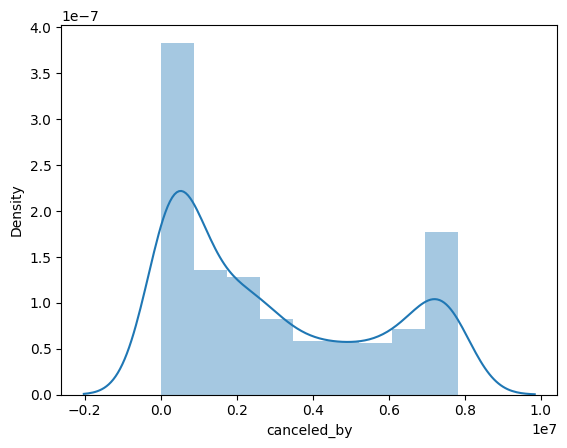

In [ ]:
# checking 'canceled_by' column's Distribution. It's not Normally Distributed.
sns.distplot(df['canceled_by'])

<Axes: ylabel='Density'>

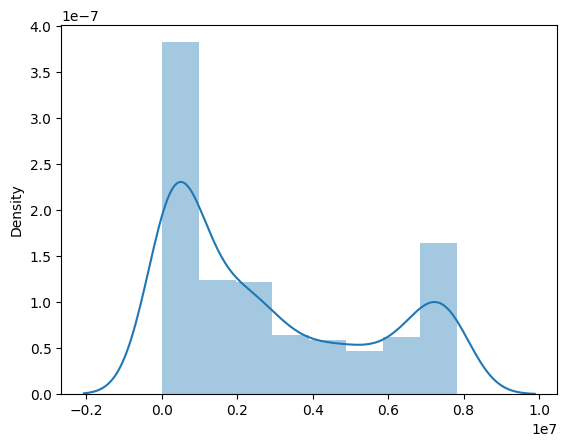

In [ ]:
# checking 'cancelByRider', sub-category's of 'canceled_by' column's Distribution. It's not Normally Distributed.
sns.distplot(cancelByRider)


<Axes: ylabel='Density'>

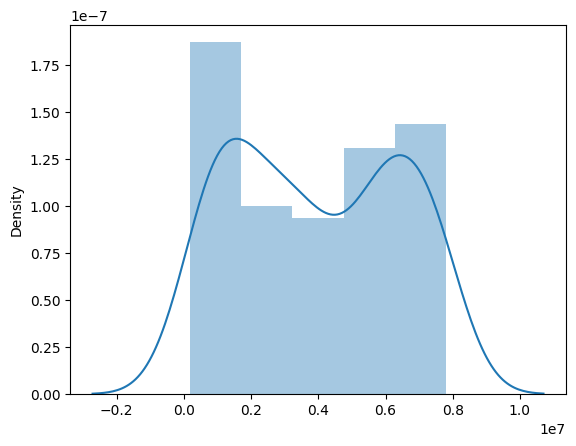

In [ ]:
# checking 'cancelByDriver', sub-category's of 'canceled_by' column's Distribution. It's not Normally Distributed.
sns.distplot(cancelByDriver)

### Note of `canceled_by` column:
- The majority 71.48% ride that is 2544 ride canceled by System. that means Successfully Complete the ride.
-  25.57% ride, that is 910 ride canceled by Rider.
- And 2.95% ride, that is 910 ride canceled by the Driver.
- The percentage of canceled ride by both rider and drivers are 28.52% that is 910 ride, which is still much below from the canceled ride by system(successfully complete ride).
## So we can say that there was `successfully complete` most of the ride.

### Checking `rating` column
NOTE: there is 2464 values are missing(NaN).

In [ ]:
a = df['rating'].value_counts()
a

5.0    922
4.0     92
1.0     40
3.0     23
2.0     18
Name: rating, dtype: int64

<Axes: >

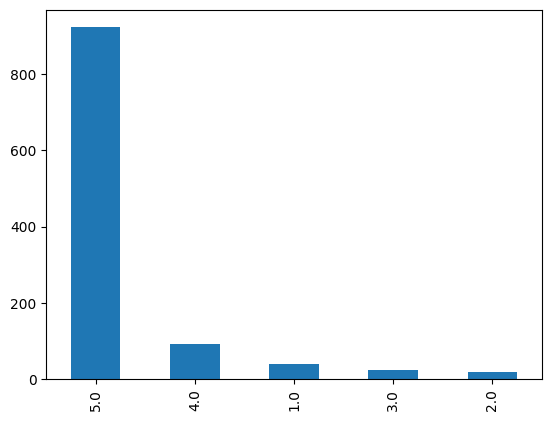

In [ ]:
# creating a barplot
a.plot(kind='bar')

In [ ]:
df['rating'].isna().sum()

2464

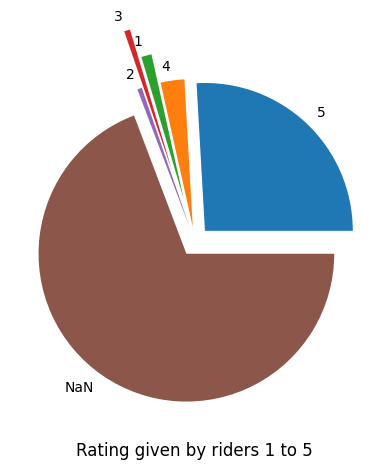

In [ ]:
# creating a pie chart

a = df['rating'].value_counts()
b = df['rating'].isna().sum()

labels = [5,4,1,3,2, 'NaN']
size = [922,92,40,23,18,2464]

plt.pie(size, labels=labels, explode=(0.1 ,0.1, 0.3, 0.5, 0.1, 0.1))
plt.title('Rating given by riders 1 to 5', y=-0.1)
plt.show()

### Note of 'rating' column:
- There are 2464 missing values(NaN) of `rating` column.
- from the figure we can see that Majority portion of the rating is NaN. That means rider hadn't given any rating or maximum portion are missing values. The count is : 2464
- Apert from that, maximum rider are given ratin:5, The count is: 922
- After that rating:4, rating:1, rating:3 and rating:2. The counts are respectively 92,40,23,18.
## so, we can say that Riders not usually gave rating for the Ride. But those who had given rating to the ride are mostly given 5 rating.

## 3. Checking `discount` column
- There are 1869 missing(NaN) values in this column.

In [ ]:
df['discount'].isna().sum()

1869

In [ ]:
df['discount'].value_counts().sum()


1690

In [ ]:
df['discount'].value_counts()


50.0    516
13.0     85
12.0     74
10.0     72
9.0      71
11.0     64
14.0     64
15.0     63
7.0      58
8.0      58
6.0      46
16.0     45
17.0     36
0.0      34
19.0     31
18.0     25
20.0     22
5.0      17
39.0     15
49.0     14
21.0     14
46.0     14
35.0     13
47.0     13
48.0     13
22.0     13
32.0     13
26.0     12
44.0     12
45.0     12
34.0     12
41.0     12
31.0     10
40.0     10
42.0     10
23.0     10
43.0     10
36.0      9
38.0      9
29.0      7
33.0      7
25.0      7
30.0      6
37.0      6
24.0      6
28.0      5
27.0      5
88.0      2
84.0      2
64.0      2
53.0      1
59.0      1
73.0      1
86.0      1
Name: discount, dtype: int64

In [ ]:
df['discount'].mean()

27.957988165680472

<Axes: >

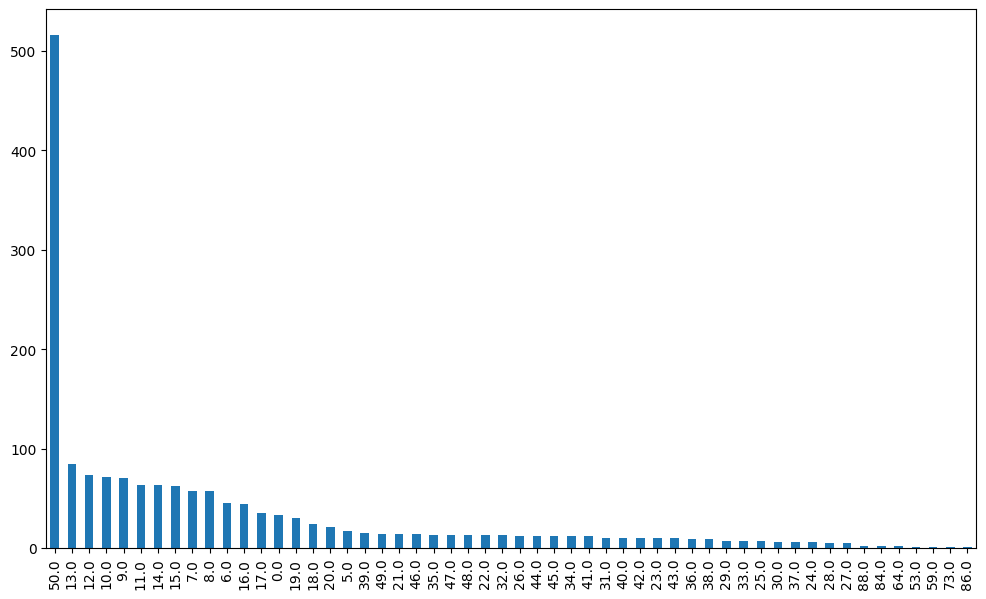

In [ ]:
df['discount'].value_counts().plot(kind='bar', figsize=(12,7))

### Note of `discount` column:
- There are 1869 missing(NaN) values of `discount` column.
- The maximum number of discount is BDT 50 that is occured 516 times.
- The minimum number of discount is BDT 86 that is occured 1 times.
- The average discount is BDT 27.95.
## So we can see, the maximum discount is BDT 50 and occured 516 which is amazing and average discount is BDT 27.95 which is prety good.

## 4. Checking `review_requested` column

In [ ]:
c = df['review_requested'].value_counts()
c

0    3540
1      19
Name: review_requested, dtype: int64

<Axes: title={'center': 'Review Requested'}, xlabel='Requested & Not Requested'>

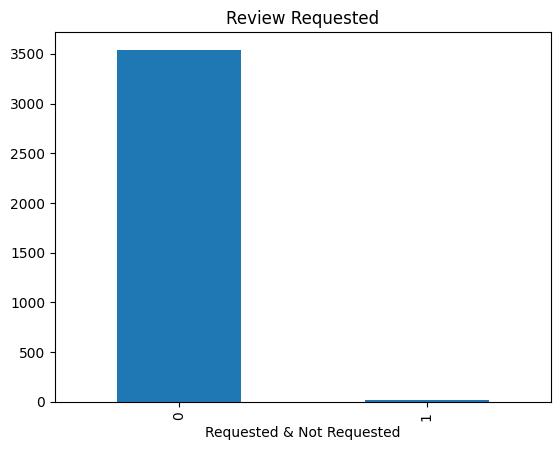

In [ ]:
# creating a bar plot
c.plot(kind='bar', xlabel='Requested & Not Requested', title='Review Requested')

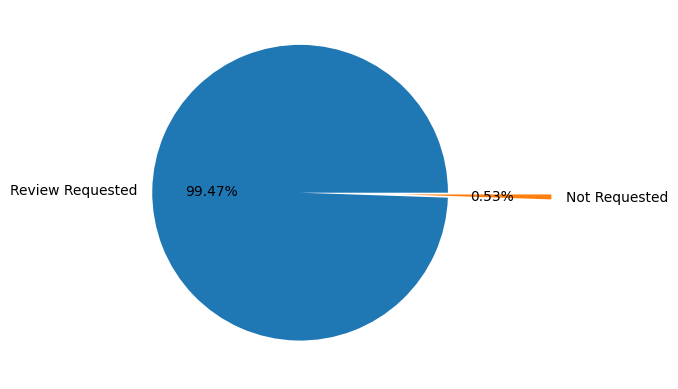

In [ ]:
# creating a pie cart

labels = ['Review Requested', 'Not Requested']
size = [3540, 19]
explode = 0.6, 0.1

plt.pie(size, labels=labels, explode=explode, autopct='%0.2f%%')
plt.show()

### Note of `review_requested` column:
- We can see, review requested by Drivers is High that is 99.47%.
- And review Not Requested by Drivers are very low, that is 0.53%
## so we can say that Drivers are requesting to the riders almost every time to give them a review which is ovious for thie rating.

### 5. Checking `payment_type` column

In [ ]:
d = df['payment_type'].value_counts()
d

1    3504
2      55
Name: payment_type, dtype: int64

<Axes: >

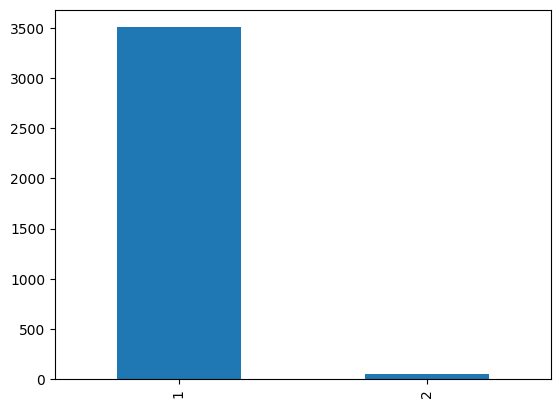

In [ ]:
# creating a bar chart
d.plot(kind='bar')

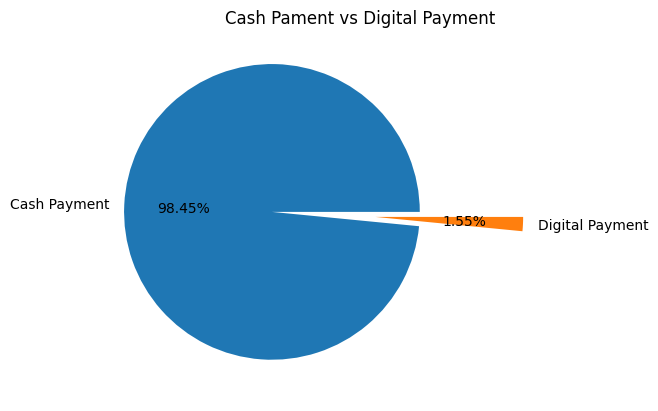

In [ ]:
# payment_type on pie chart

labels = ['Cash Payment', 'Digital Payment']
size = [3504, 55]
explode = 0.6, 0.1

plt.pie(size, labels=labels, explode=explode, autopct='%0.2f%%')
plt.title('Cash Pament vs Digital Payment')
plt.show()

### Note of `payment_type` columnL
- Riders are pay their riding cost by Cash 98.45% times.
- And by Digital Payment is 1.55% time.
## So we can confidently say that riders are prefer to pay their riding cost by Cash.

# 6. Checking `status` column

In [ ]:
df['status'].value_counts()

CANCELED     1869
COMPLETED    1690
Name: status, dtype: int64

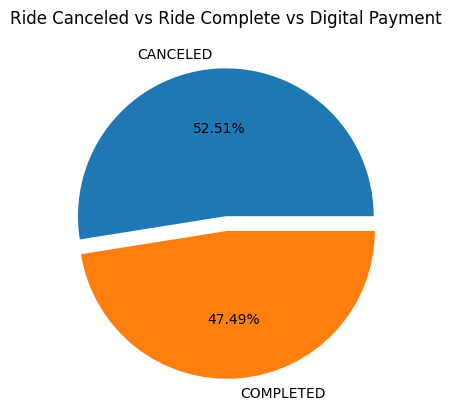

In [ ]:
#  pie chart on status column

labels = ['CANCELED', 'COMPLETED']
size = [1869, 1690]
explode = 0, 0.1

plt.pie(size, labels=labels, explode=explode, autopct='%0.2f%%')
plt.title('Ride Canceled vs Ride Complete vs Digital Payment')
plt.show()

### Note of 'status' column:
- 52.51% ride Canceled.
- 47.49% ride Completed.
## It's clear to us that percentage of Rides canceled than Completed. It's a vital insight for the company.  

# Summary:
- There are 4 column contains missing values. They are:
1. canceled_by (successfull Ride)                2544
2. rating                                        2464
3. discount                                      1869
4. drivers_tried                                 173

- The dataset 3559 rows in total. The first 2 columns contain a lot of missing values(NaN), almost 75 percentile and the 3rd column contains almost half or 50 percentile missing values. The most import part is those 4 columnsare not important for predict out target variable using regression method. We we don't have to handle missing values of these columns. we did Exploratory data Analysis on these columns for getting insights.



## Handling mssing values
- Handling NaN values of
  - `rating`,
  - `discount`,
  - `canceled_by`
  
using `map_function`

In [ ]:
df5 = df
df5.sample(10)

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare
673,2864,94BC23,719804,0,1432,9067,CANCELED,NaN,"2107796,4459130,552017,3790034,",0,NaN,NaN,1,160
1590,348,94G3ML,35129,5011785,910,4910,COMPLETED,5.0,"521708,5963517,5011785,",0,39.0,NaN,1,78
227,2429,94BM08,887518,0,965,4590,CANCELED,NaN,"6493736,5199231,",0,NaN,NaN,1,119
3521,3702,94EOEF,2738773,5885255,820,5148,COMPLETED,NaN,"308296,5885255,",0,11.0,NaN,1,107
788,32,94G5HA,7408634,7124700,874,4851,COMPLETED,5.0,"3735532,4936233,3285255,6752013,7124700,",0,48.0,NaN,1,96
882,2720,94CD23,182243,4158317,1150,6143,CANCELED,NaN,"633647,4158317,",0,NaN,182243.0,1,92
1973,796,94E36R,805264,0,940,3807,CANCELED,NaN,NaN,0,NaN,805264.0,1,103
3135,2432,94CMAN,533281,2805032,1555,11009,CANCELED,NaN,"309062,2232120,6402306,7236924,2805032,",0,NaN,2805032.0,1,170
667,4762,94DGK4,3180584,471809,1292,7346,COMPLETED,5.0,"471809,",0,50.0,NaN,1,105
3227,781,94C071,3942243,0,672,3557,CANCELED,NaN,"2834483,2405701,",0,NaN,NaN,1,97


In [ ]:
# Assingning 1, 2 and 0 for cancelByRider, cancelByDriver and cancelBySystem

import pandas as pd

def separate_cancellation_reasons(df):
    cancelByRider = []
    cancelByDriver = []
    cancelBySystem = []

    for i, row in df.iterrows():
        canceled_by = row['canceled_by']
        rider_id = row['rider_id']
        driver_id = row['driver_id']

        if canceled_by == rider_id:
            cancelByRider.append(1)
        elif canceled_by == driver_id:
            cancelByDriver.append(2)
        else:
            cancelBySystem.append(0)

    # Add a new column to the dataframe with values based on the conditions
    df['canceled_by_new'] = pd.Series(cancelByRider + cancelByDriver + cancelBySystem)

    return df

# Call the function with the dataframe as input
df = separate_cancellation_reasons(df)

# Print the updated dataframe



In [ ]:
df.head(30)

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare,canceled_by_new
0,295,94DKEP,2750102,1905204,1010,5919,COMPLETED,5.0,"1905204,",0,44.0,NaN,1,89,1
1,923,94FTOJ,703684,2707623,2041,12440,CANCELED,NaN,"2208853,5697379,6530412,6986550,831898,297069,...",0,NaN,703684.0,1,163,1
2,3254,94CP5P,2292525,1428994,634,3173,COMPLETED,NaN,"7215059,1428994,",0,6.0,NaN,1,58,1
3,1096,94D4G1,7585415,6412601,1279,7961,CANCELED,NaN,"7709276,523565,6412601,",0,NaN,7585415.0,1,112,1
4,1817,94EC6Q,1049024,6812604,1085,4242,CANCELED,NaN,"1474009,6573666,353014,6124924,2301057,371675,...",0,NaN,1049024.0,1,72,1
5,1326,94FL1O,1049207,223878,908,5084,CANCELED,NaN,"4332526,1537829,4320058,4862584,4140470,680999...",0,NaN,1049207.0,1,103,1
6,2967,94BJQK,36184,0,2018,10793,CANCELED,NaN,NaN,0,NaN,NaN,1,183,1
7,4475,94EH33,453261,534880,1391,5653,COMPLETED,4.0,"5543578,534880,",0,50.0,NaN,1,115,1
8,3281,94D6TK,7018863,4154958,1031,4496,COMPLETED,NaN,"7756588,3986702,4154958,",0,7.0,NaN,1,74,1
9,4736,94EK0D,105805,7398319,1041,7015,COMPLETED,5.0,"7398319,",0,50.0,NaN,1,130,1


In [ ]:
# handling NaN values of rating column
# filling NaN values by 0

# df['rating'] = df['rating'].apply(lambda x: 0 if pd.isna(x) else x)
# df['discount'] = df['discount'].apply(lambda x: 0 if pd.isna(x) else x)

df['rating'] = df['rating'].fillna(0)
df['discount'] = df['discount'].fillna(0)

In [ ]:
mapping = {'COMPLETED': 0, 'CANCELED':1}
df['status'] = df['status'].map(mapping)

In [ ]:
df.head(100)

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type,estimated_fare,canceled_by_new
0,295,94DKEP,2750102,1905204,1010,5919,0,5.0,"1905204,",0,44.0,NaN,1,89,1
1,923,94FTOJ,703684,2707623,2041,12440,1,0.0,"2208853,5697379,6530412,6986550,831898,297069,...",0,0.0,703684.0,1,163,1
2,3254,94CP5P,2292525,1428994,634,3173,0,0.0,"7215059,1428994,",0,6.0,NaN,1,58,1
3,1096,94D4G1,7585415,6412601,1279,7961,1,0.0,"7709276,523565,6412601,",0,0.0,7585415.0,1,112,1
4,1817,94EC6Q,1049024,6812604,1085,4242,1,0.0,"1474009,6573666,353014,6124924,2301057,371675,...",0,0.0,1049024.0,1,72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4203,94B99R,19815,3593550,1519,9607,0,2.0,"7355455,1729293,3593550,",0,17.0,NaN,1,168,1
96,3346,94B1G8,6874979,6763721,903,5515,0,0.0,"6763721,",0,8.0,NaN,1,84,1
97,3560,94CQ7C,5515384,7218133,1175,6813,0,5.0,"5147595,5577321,7218133,",0,10.0,NaN,1,99,1
98,2812,94FC4I,272607,7151511,1686,9843,1,0.0,"7151511,",0,0.0,272607.0,1,187,1


In [ ]:
# droppig unnecessary features

df1 = df.drop(df.columns[0], axis=1)

In [ ]:
df1 = df1.drop(['hashed_id','rider_id','driver_id','drivers_tried','canceled_by','canceled_by_new'], axis=1)
df1

,estimated_ride_duration,estimated_ride_distance,status,rating,review_requested,discount,payment_type,estimated_fare
0,1010,5919,0,5.0,0,44.0,1,89
1,2041,12440,1,0.0,0,0.0,1,163
2,634,3173,0,0.0,0,6.0,1,58
3,1279,7961,1,0.0,0,0.0,1,112
4,1085,4242,1,0.0,0,0.0,1,72
...,...,...,...,...,...,...,...,...
3554,1306,7632,1,0.0,0,0.0,1,144
3555,965,4756,1,0.0,0,0.0,1,90
3556,1584,10873,1,0.0,0,0.0,1,199
3557,1776,10961,0,5.0,0,50.0,1,207


In [ ]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_df = pd.DataFrame(ss.fit_transform(df1),columns = df1.columns)
train_df

,estimated_ride_duration,estimated_ride_distance,status,rating,review_requested,discount,payment_type,estimated_fare
0,-0.505929,-0.405493,-1.051626,1.607221,-0.073261,1.632283,-0.125285,-0.728526
1,1.650965,1.262400,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,0.732698
2,-1.292537,-1.107845,-1.051626,-0.649763,-0.073261,-0.386549,-0.125285,-1.340660
3,0.056830,0.116795,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,-0.274362
4,-0.349026,-0.834424,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,-1.064212
...,...,...,...,...,...,...,...,...
3554,0.113315,0.032645,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,0.357519
3555,-0.600071,-0.702957,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,-0.708779
3556,0.694902,0.861605,0.950908,-0.649763,-0.073261,-0.705312,-0.125285,1.443563
3557,1.096574,0.884112,-1.051626,1.607221,-0.073261,1.951046,-0.125285,1.601533


# testing dataset

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,Unnamed: 0,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,431,94BARA,221768,6379648,874,3513,COMPLETED,5.0,"438390,360585,6379648,",0,41.0,NaN,2
1,2543,94FTCI,7168674,2824024,1467,8030,CANCELED,NaN,"1313403,4365054,7280851,7306862,7414872,670241...",0,NaN,7168674.0,1
2,1187,94F9K2,7625087,3849380,1176,8349,CANCELED,NaN,"2043830,3849380,",0,NaN,7625087.0,1
3,747,94EANM,207440,5255827,1268,7681,CANCELED,NaN,"5653077,5255827,",0,NaN,207440.0,1
4,2542,94FM5A,3855518,403288,1382,8217,CANCELED,NaN,"1147040,403288,",0,NaN,3855518.0,1


In [ ]:
# droppig unnecessary features

test_df = test_df.drop(df.columns[0], axis=1)
test_df.head()

,hashed_id,rider_id,driver_id,estimated_ride_duration,estimated_ride_distance,status,rating,drivers_tried,review_requested,discount,canceled_by,payment_type
0,94BARA,221768,6379648,874,3513,COMPLETED,5.0,"438390,360585,6379648,",0,41.0,NaN,2
1,94FTCI,7168674,2824024,1467,8030,CANCELED,NaN,"1313403,4365054,7280851,7306862,7414872,670241...",0,NaN,7168674.0,1
2,94F9K2,7625087,3849380,1176,8349,CANCELED,NaN,"2043830,3849380,",0,NaN,7625087.0,1
3,94EANM,207440,5255827,1268,7681,CANCELED,NaN,"5653077,5255827,",0,NaN,207440.0,1
4,94FM5A,3855518,403288,1382,8217,CANCELED,NaN,"1147040,403288,",0,NaN,3855518.0,1


In [ ]:
# dropping unnecessary features

test_df = test_df.drop(['hashed_id','rider_id','driver_id','drivers_tried','canceled_by'], axis=1)
test_df

,estimated_ride_duration,estimated_ride_distance,status,rating,review_requested,discount,payment_type
0,874,3513,COMPLETED,5.0,0,41.0,2
1,1467,8030,CANCELED,NaN,0,NaN,1
2,1176,8349,CANCELED,NaN,0,NaN,1
3,1268,7681,CANCELED,NaN,0,NaN,1
4,1382,8217,CANCELED,NaN,0,NaN,1
...,...,...,...,...,...,...,...
1521,809,3940,CANCELED,NaN,0,NaN,1
1522,974,4405,CANCELED,NaN,0,NaN,1
1523,1184,9039,CANCELED,NaN,0,NaN,1
1524,1343,8121,COMPLETED,5.0,0,50.0,1


In [ ]:
# Handling missing values. Filling NaN values by 0

test_df['rating'] = test_df['rating'].fillna(0)
test_df['discount'] = test_df['discount'].fillna(0)

In [ ]:
# doing data transformation using map function

mapping = {'COMPLETED': 0, 'CANCELED':1}
test_df['status'] = test_df['status'].map(mapping)

In [ ]:
test_df.head()

,estimated_ride_duration,estimated_ride_distance,status,rating,review_requested,discount,payment_type
0,874,3513,0,5.0,0,41.0,2
1,1467,8030,1,0.0,0,0.0,1
2,1176,8349,1,0.0,0,0.0,1
3,1268,7681,1,0.0,0,0.0,1
4,1382,8217,1,0.0,0,0.0,1


In [ ]:
# Scaling the test dataset apply Standard Scaler

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test_df = pd.DataFrame(ss.fit_transform(test_df),columns = test_df.columns)
test_df

,estimated_ride_duration,estimated_ride_distance,status,rating,review_requested,discount,payment_type
0,-0.812242,-1.063445,-1.080562,1.657843,-0.057335,1.494801,8.465617
1,0.454337,0.141399,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
2,-0.167205,0.226487,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
3,0.029296,0.048308,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
4,0.272787,0.191278,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
...,...,...,...,...,...,...,...
1521,-0.951075,-0.949549,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
1522,-0.598654,-0.825517,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
1523,-0.150118,0.410534,0.925445,-0.632045,-0.057335,-0.705136,-0.118125
1524,0.189488,0.165671,-1.080562,1.657843,-0.057335,1.977714,-0.118125


# Model Creation and validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score



In [ ]:
features = train_df[['estimated_ride_duration', 'estimated_ride_distance', 'status', 'rating', 'review_requested', 'discount', 'payment_type']]
X = features
y = train_df['estimated_fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)


# train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_train_predictions = linear_model.predict(X_test)



# Checking Accuracy
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)
print('MAE:', metrics.mean_absolute_error(linear_train_predictions, y_test))
print('MSE:', metrics.mean_squared_error(linear_train_predictions, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(linear_train_predictions, y_test)))
accuracy = linear_model.score(X_test, y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:', r2_score(linear_train_predictions, y_test))






Coefficients: [ 0.15792959  0.75974646  0.13892085 -0.00270627  0.00092254  0.08151281
  0.00321787]
Intercept: 0.0013968763886430305
MAE: 0.3251631354966526
MSE: 0.16581456641591574
RMSE: 0.40720334774644934
Accuracy: 84.42880874832883 %
R2: 0.8113611286778754


In [ ]:

# using random forest

features = train_df[['estimated_ride_duration', 'estimated_ride_distance', 'status', 'rating', 'review_requested', 'discount', 'payment_type']]
X = features
y = train_df['estimated_fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# train a Random forest model
rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=0)
rf.fit(X_train, y_train)

random_forest_predictions = rf.predict(X_train)

# Checking Accuracy

print('MAE:', metrics.mean_absolute_error(random_forest_predictions, y_train))
print('MSE:', metrics.mean_squared_error(random_forest_predictions, y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(random_forest_predictions, y_train)))
accuracy = rf.score(X_test, y_test)
print('Accuracy:',accuracy*100,'%')
print('R2:', r2_score(random_forest_predictions, y_train))



MAE: 0.29016252581149443
MSE: 0.12522053263574695
RMSE: 0.35386513339936015
Accuracy: 85.42544389453073 %
R2: 0.851291399767782


In [ ]:
rf.predict(X_test)

array([-1.04393565,  0.96976149, -0.42114435, -0.83674077,  0.07463002,
       -0.63487649, -0.02307102,  0.20497415, -0.71800303,  0.97603036,
        0.43139721,  0.18771673, -0.31983662,  0.8507907 , -0.29367768,
        0.14307671, -1.01256139,  1.41390327, -0.77077198,  7.11469023,
        0.5725738 , -0.60473234,  1.41390327, -0.23426607, -0.43598549,
       -1.26894764,  0.79933294, -0.94938955, -0.00881974, -0.28570796,
       -1.04393565,  0.03317714, -0.00878602, -0.55062396,  0.03665558,
       -1.34999692,  0.13573794, -0.17001297,  0.5725738 , -0.94938955,
        2.16647415,  0.37450805,  7.18380215,  0.5725738 ,  0.16196253,
       -0.81044759,  0.27887823,  2.61118162, -0.29367768,  0.01342122,
        0.335966  , -0.79797357,  0.31340013, -0.94938955,  0.45970159,
       -1.10588423,  0.75774436, -0.07639921,  1.00480957, -0.3523145 ,
        0.49076456,  0.15386272, -0.06953821, -0.07639921, -1.06827171,
        0.45970159,  0.12720424,  1.41961826,  0.31340013, -0.19

# Observation:
- we got 84.22% applying Linear Regression
- we got 85.42 applying Random Forest
